In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

import utils.sulfur.constant as const
from utils.CaImageCSV import CaImageCSV

In [2]:
def droped_unique_cells(cells1, cells2):
    droped_cells = np.array([])
    droped_cells = np.append(droped_cells, cells1)
    droped_cells = np.append(droped_cells, cells2)
    droped_cells = np.unique(droped_cells)
    return droped_cells

def all_nan_cells(matrix):
    nan_cells = np.array([])
    for cell_name, items in matrix.iteritems():
        if items.isnull().all():
            nan_cells = np.append(nan_cells, cell_name)
            
    return nan_cells

def splitted_context_name(context_name, index):
    return '%s_%d' % (context_name, index)

def build_matrix_index(context_name, cells):
    index_df = pd.DataFrame(data=([context_name] * len(cells)))
    index_df.columns = ['context']
    cells = cells.reset_index(drop=True)
    index_df['cell_name'] = cells
    return pd.MultiIndex.from_frame(index_df, names=['context_name', 'cell_name'])

def split_matrix(matrix, context_name):
    matrix_1 = matrix.iloc[0:400, :]
    matrix_2 = matrix.iloc[900:1300, :]
    matrix_3 = matrix.iloc[1800:2200, :]
    
    matrix_1.rename(lambda x: splitted_context_name(x, 1), inplace=True)
    matrix_2.rename(lambda x: splitted_context_name(x, 2), inplace=True)
    matrix_3.rename(lambda x: splitted_context_name(x, 3), inplace=True)
    
    return matrix_1, matrix_2, matrix_3

def split_engram_matrix(origin, context_name):
    matrix = origin.filtered_by_context(context_name).astype(float).copy(deep=True)
    matrix = origin.optimize_std(matrix)
    matrix.reset_index(level=1, drop=True, inplace=True)
    
    engram_matrix = matrix.loc[:, origin.engram_cells()]
    non_engram_matrix = matrix.loc[:, csv.non_engram_cells()]
    
    return engram_matrix, non_engram_matrix

In [10]:
index = const.ANIMAL_NAMES
column_df = pd.DataFrame()
column_df['cell type'] = ['engram', 'engram', 'engram', 'engram', 'engram', 'engram', 'non-engram', 'non-engram', 'non-engram', 'non-engram', 'non-engram', 'non-engram']
column_df['context'] = ['A1preES', 'A1postES', 'A2_1', 'A2_2', 'A3_1', 'A3_2'] * 2
columns = pd.MultiIndex.from_frame(column_df)
across_session_df = pd.DataFrame(0.0, columns=columns, index=index)
inner_session_df = pd.DataFrame(0.0, columns=columns, index=index)
for animal_name in const.ANIMAL_NAMES:
    file_path = './resources/%s_Longitudinal_Traces.csv' % animal_name
    csv = CaImageCSV(file_path)
    
    # A1preES
    A1preES_engram, A1preES_non_engram = split_engram_matrix(csv, 'A1preES')
    
    A1preES_nan_engram_cells = all_nan_cells(A1preES_engram)
    A1preES_nan_non_engram_cells = all_nan_cells(A1preES_non_engram)
    
    # A1postES
    A1postES_engram, A1postES_non_engram = split_engram_matrix(csv, 'A1postES')
    
    A1postES_nan_engram_cells = all_nan_cells(A1postES_engram)
    A1postES_nan_non_engram_cells = all_nan_cells(A1postES_non_engram)
    
    # A2_1, A2_2
    A2_1_engram, A2_1_non_engram = split_engram_matrix(csv, 'A2_1')
    
    A2_1_nan_engram_cells = all_nan_cells(A2_1_engram)
    A2_1_nan_non_engram_cells = all_nan_cells(A2_1_non_engram)
    
    A2_2_engram, A2_2_non_engram = split_engram_matrix(csv, 'A2_2')
    
    A2_2_nan_engram_cells = all_nan_cells(A2_2_engram)
    A2_2_nan_non_engram_cells = all_nan_cells(A2_2_non_engram)
    
    # A3_1, A3_2
    A3_1_engram, A3_1_non_engram = split_engram_matrix(csv, 'A3_1')
    
    A3_1_nan_engram_cells = all_nan_cells(A3_1_engram)
    A3_1_nan_non_engram_cells = all_nan_cells(A3_1_non_engram)
    
    A3_2_engram, A3_2_non_engram = split_engram_matrix(csv, 'A3_2')
    
    A3_2_nan_engram_cells = all_nan_cells(A3_2_engram)
    A3_2_nan_non_engram_cells = all_nan_cells(A3_2_non_engram)
    
    # fetch dropped cells
    dropped_engram_cells = droped_unique_cells(A1preES_nan_engram_cells, A1postES_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A2_1_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A2_2_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A3_1_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A3_2_nan_engram_cells)
    
    dropped_non_engram_cells = droped_unique_cells(A1preES_nan_non_engram_cells, A1postES_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A2_1_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A2_2_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A3_1_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A3_2_nan_non_engram_cells)
    
    # A1preES
    A1preES_engram.drop(columns=dropped_engram_cells, inplace=True)
    A1preES_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A1preES_engram = A1preES_engram.iloc[2600:3000, :]
    A1preES_non_engram = A1preES_non_engram.iloc[2600:3000, :]
    
    # A1postES
    A1postES_engram.drop(columns=dropped_engram_cells, inplace=True)
    A1postES_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A1postES_engram = A1postES_engram.iloc[1800:2200, :]
    A1postES_non_engram = A1postES_non_engram.iloc[1800:2200, :]
    
    # A2_1, A2_2
    A2_1_engram.drop(columns=dropped_engram_cells, inplace=True)
    A2_1_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A2_2_engram.drop(columns=dropped_engram_cells, inplace=True)
    A2_2_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A2_1_engram_start = A2_1_engram.iloc[0:400, :]
    A2_2_engram_end = A2_2_engram.iloc[2600:3000, :]
    
    A2_1_non_engram_start = A2_1_non_engram.iloc[0:400, :]
    A2_2_non_engram_end = A2_2_non_engram.iloc[2600:3000, :]
    
    # A3_1, A3_2
    A3_1_engram.drop(columns=dropped_engram_cells, inplace=True)
    A3_1_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A3_2_engram.drop(columns=dropped_engram_cells, inplace=True)
    A3_2_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A3_1_engram_start = A3_1_engram.iloc[0:400, :]
    A3_2_engram_end = A3_2_engram.iloc[2600:3000, :]
    
    A3_1_non_engram_start = A3_1_non_engram.iloc[0:400, :]
    A3_2_non_engram_end = A3_2_non_engram.iloc[2600:3000, :]
    
    across_session_df.loc[animal_name, ('engram', 'A1preES')]    = np.mean(pairwise_distances(A1preES_engram, A1preES_engram))
    across_session_df.loc[animal_name, ('engram', 'A1postES')] = np.mean(pairwise_distances(A1preES_engram, A1postES_engram))
    across_session_df.loc[animal_name, ('engram', 'A2_1')]       = np.mean(pairwise_distances(A1preES_engram, A2_1_engram_start))
    across_session_df.loc[animal_name, ('engram', 'A2_2')]       = np.mean(pairwise_distances(A1preES_engram, A2_2_engram_end))
    across_session_df.loc[animal_name, ('engram', 'A3_1')]       = np.mean(pairwise_distances(A1preES_engram, A3_1_engram_start))
    across_session_df.loc[animal_name, ('engram', 'A3_2')]       = np.mean(pairwise_distances(A1preES_engram, A3_2_engram_end))
    
    across_session_df.loc[animal_name, ('non-engram', 'A1preES')]    = np.mean(pairwise_distances(A1preES_non_engram, A1preES_non_engram))
    across_session_df.loc[animal_name, ('non-engram', 'A1postES')] = np.mean(pairwise_distances(A1preES_non_engram, A1postES_non_engram))
    across_session_df.loc[animal_name, ('non-engram', 'A2_1')]       = np.mean(pairwise_distances(A1preES_non_engram, A2_1_non_engram_start))
    across_session_df.loc[animal_name, ('non-engram', 'A2_2')]       = np.mean(pairwise_distances(A1preES_non_engram, A2_2_non_engram_end))
    across_session_df.loc[animal_name, ('non-engram', 'A3_1')]       = np.mean(pairwise_distances(A1preES_non_engram, A3_1_non_engram_start))
    across_session_df.loc[animal_name, ('non-engram', 'A3_2')]       = np.mean(pairwise_distances(A1preES_non_engram, A3_2_non_engram_end))
    
    inner_session_df.loc[animal_name, ('engram', 'A1preES')]    = np.mean(pairwise_distances(A1preES_engram, A1preES_engram))
    inner_session_df.loc[animal_name, ('engram', 'A1postES')] = np.mean(pairwise_distances(A1postES_engram, A1postES_engram))
    inner_session_df.loc[animal_name, ('engram', 'A2_1')]       = np.mean(pairwise_distances(A2_1_engram_start, A2_1_engram_start))
    inner_session_df.loc[animal_name, ('engram', 'A2_2')]       = np.mean(pairwise_distances(A2_2_engram_end, A2_2_engram_end))
    inner_session_df.loc[animal_name, ('engram', 'A3_1')]       = np.mean(pairwise_distances(A3_1_engram_start, A3_1_engram_start))
    inner_session_df.loc[animal_name, ('engram', 'A3_2')]       = np.mean(pairwise_distances(A3_2_engram_end, A3_2_engram_end))
    
    inner_session_df.loc[animal_name, ('non-engram', 'A1preES')]    = np.mean(pairwise_distances(A1preES_non_engram, A1preES_non_engram))
    inner_session_df.loc[animal_name, ('non-engram', 'A1postES')] = np.mean(pairwise_distances(A1postES_non_engram, A1postES_non_engram))
    inner_session_df.loc[animal_name, ('non-engram', 'A2_1')]       = np.mean(pairwise_distances(A2_1_non_engram_start, A2_1_non_engram_start))
    inner_session_df.loc[animal_name, ('non-engram', 'A2_2')]       = np.mean(pairwise_distances(A2_2_non_engram_end, A2_2_non_engram_end))
    inner_session_df.loc[animal_name, ('non-engram', 'A3_1')]       = np.mean(pairwise_distances(A3_1_non_engram_start, A3_1_non_engram_start))
    inner_session_df.loc[animal_name, ('non-engram', 'A3_2')]       = np.mean(pairwise_distances(A3_2_non_engram_end, A3_2_non_engram_end))


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [11]:
across_session_df.to_csv('./resources/pairwise_distance/extinction2/across_session.csv')

In [12]:
inner_session_df.to_csv('./resources/pairwise_distance/extinction2/inner_session.csv')

In [13]:
calc_across_session_df = across_session_df.copy(deep=True)
for index, rows in calc_across_session_df.iloc[:, 0:6].iterrows():
    first_value = rows[0]
    rows -= first_value
for index, rows in calc_across_session_df.iloc[:, 6:].iterrows():
    first_value = rows[0]
    rows -= first_value
calc_across_session_df

cell type     engram                                                    \
context      A1preES  A1postES      A2_1      A2_2      A3_1      A3_2   
ID181106CreA     0.0  2.293979  2.010269  2.743618  3.172817  2.246398   
ID181106CreB     0.0  0.268104  0.799552  0.322873  0.705427 -0.462542   
ID181106CreC     0.0  1.803573  2.007185  1.389212  1.662679  1.874286   
ID181106CreG     0.0  2.644730  2.823711  1.833928  1.952086  3.118211   
ID181106CreH     0.0  2.593920  4.155924  2.632552  6.469581  4.771126   
ID181106CreI     0.0  5.728797  7.249591  6.412530  7.841159  7.696118   
ID181106CreK     0.0  2.639789  2.378072  2.321704  3.108080  2.278516   
ID181106CreL     0.0  0.902452  0.525914  1.323453  2.853977  2.422616   
ID181106CreN     0.0  2.386750  1.917861  3.452311  3.183922  2.051497   
ID181106CreQ     0.0  0.881866  0.674719  1.428732  1.969076  1.111530   

cell type    non-engram                                                      
context         A1preES  A1postES      A2_1       A2_2       A3_1      A3_2  
ID181106CreA        0.0  5.496963  6.787592  10.278127  12.481322  6.101946  
ID181106CreB        0.0  1.603575  5.435486   3.428653   5.237008  2.469591  
ID181106CreC        0.0  3.464434  5.827884   3.520029   4.933212  1.922382  
ID181106CreG        0.0  4.831359  7.972209   3.980043   8.957420  7.710737  
ID181106CreH        0.0  5.723895  9.769527   6.897977  11.935110  8.679820  
ID181106CreI        0.0  6.375596  8.395630   8.201727  12.334498  9.850456  
ID181106CreK        0.0  6.356658  8.884599   5.895360   9.377070  6.606360  
ID181106CreL        0.0  4.982282  8.014936   6.488296  10.623937  7.419979  
ID181106CreN        0.0  6.986615  6.818399   6.635858   8.543649  7.449458  
ID181106CreQ        0.0  3.785046  6.894813   5.703816   7.764432  5.622384

In [14]:
calc_across_session_df.to_csv('./resources/pairwise_distance/extinction2/calculated_across_session.csv')

cell type     engram                                                  
context      A1preES  A1postES      A2_1      A2_2      A3_1      A3_2
ID181106CreA     0.0  2.293979  2.010269  2.743618  3.172817  2.246398
ID181106CreB     0.0  0.268104  0.799552  0.322873  0.705427 -0.462542
ID181106CreC     0.0  1.803573  2.007185  1.389212  1.662679  1.874286
ID181106CreG     0.0  2.644730  2.823711  1.833928  1.952086  3.118211
ID181106CreH     0.0  2.593920  4.155924  2.632552  6.469581  4.771126
ID181106CreI     0.0  5.728797  7.249591  6.412530  7.841159  7.696118
ID181106CreK     0.0  2.639789  2.378072  2.321704  3.108080  2.278516
ID181106CreL     0.0  0.902452  0.525914  1.323453  2.853977  2.422616
ID181106CreN     0.0  2.386750  1.917861  3.452311  3.183922  2.051497
ID181106CreQ     0.0  0.881866  0.674719  1.428732  1.969076  1.111530
cell type    non-engram                                                    
context         A1preES  A1postES      A2_1       A2_2       A3_1      A

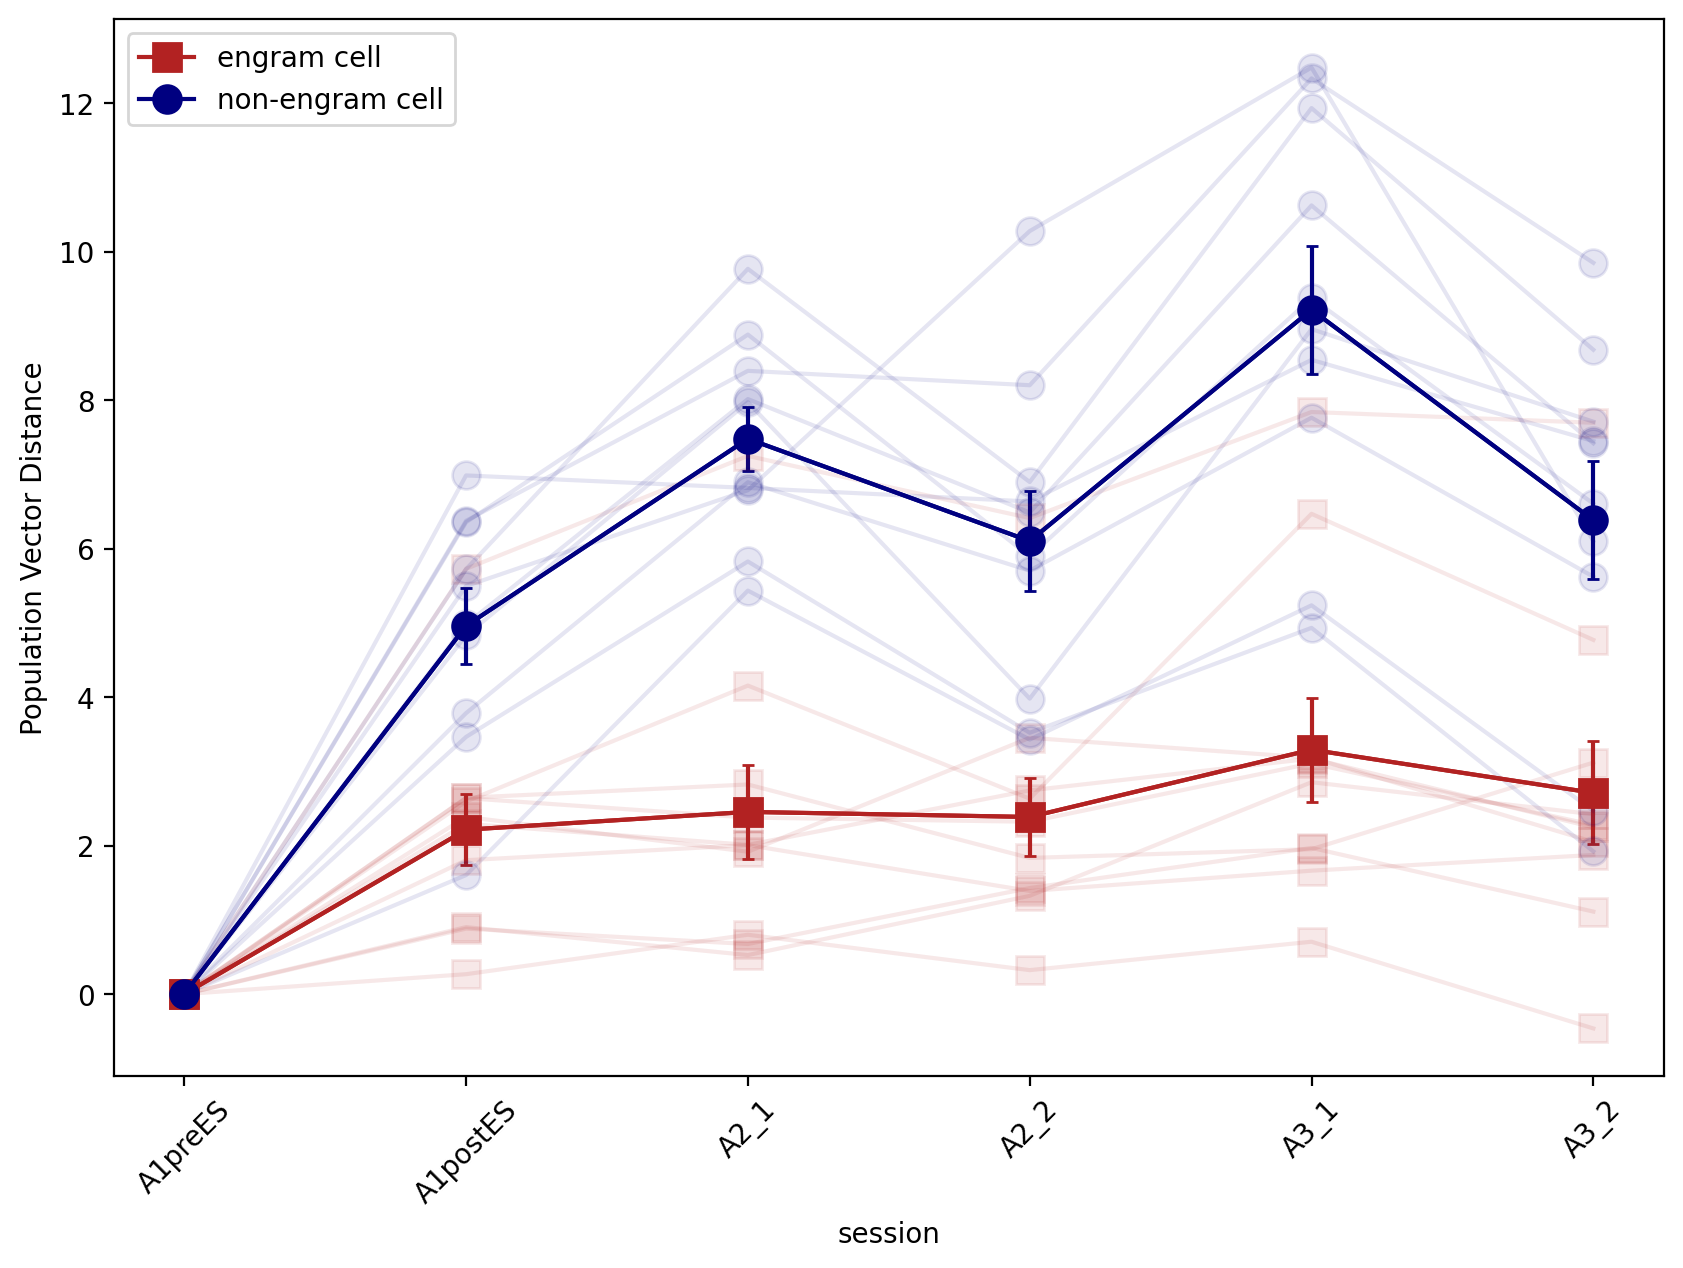

In [15]:
engram_distances = calc_across_session_df.iloc[:, 0:6]
non_engram_distances = calc_across_session_df.iloc[:, 6:]

print(engram_distances)
print(non_engram_distances)

x = engram_distances.columns.get_level_values('context').to_numpy()
engram_y, engram_err = engram_distances.mean(), engram_distances.sem()
non_engram_y, non_engram_err = non_engram_distances.mean(), non_engram_distances.sem()

plt.figure(figsize=(10, 7), dpi=200)
plt.errorbar(x, engram_y, yerr=engram_err, capsize=2, c='firebrick')
plt.plot(x, engram_y, marker='s', markersize=10, label='engram cell', c='firebrick', zorder=12)
plt.errorbar(x, non_engram_y, yerr=non_engram_err, capsize=2, c='navy')
plt.plot(x, non_engram_y, marker='o', markersize=10, label='non-engram cell', c='navy', zorder=12)

for index, rows in engram_distances.iterrows():
    plt.plot(x, rows, marker='s', markersize=10, c='firebrick', alpha=0.1)
    
for index, rows in non_engram_distances.iterrows():
    plt.plot(x, rows, marker='o', markersize=10, c='navy', alpha=0.1)

plt.xticks(rotation=45)
plt.xlabel('session')
plt.ylabel('Population Vector Distance')
plt.legend()
plt.show()

In [9]:
index = const.ANIMAL_NAMES
column_df = pd.DataFrame()
column_df['cell type'] = ['engram', 'engram', 'engram', 'engram', 'engram', 'non-engram', 'non-engram', 'non-engram', 'non-engram', 'non-engram']
column_df['context'] = ['A1postES', 'A2_1', 'A2_2', 'A3_1', 'A3_2'] * 2
columns = pd.MultiIndex.from_frame(column_df)
across_session_df = pd.DataFrame(0.0, columns=columns, index=index)
inner_session_df = pd.DataFrame(0.0, columns=columns, index=index)
for animal_name in const.ANIMAL_NAMES:
    file_path = './resources/%s_Longitudinal_Traces.csv' % animal_name
    csv = CaImageCSV(file_path)
    
    # A1postES
    A1postES_engram, A1postES_non_engram = split_engram_matrix(csv, 'A1postES')
    
    A1postES_nan_engram_cells = all_nan_cells(A1postES_engram)
    A1postES_nan_non_engram_cells = all_nan_cells(A1postES_non_engram)
    
    # A2_1, A2_2
    A2_1_engram, A2_1_non_engram = split_engram_matrix(csv, 'A2_1')
    
    A2_1_nan_engram_cells = all_nan_cells(A2_1_engram)
    A2_1_nan_non_engram_cells = all_nan_cells(A2_1_non_engram)
    
    A2_2_engram, A2_2_non_engram = split_engram_matrix(csv, 'A2_2')
    
    A2_2_nan_engram_cells = all_nan_cells(A2_2_engram)
    A2_2_nan_non_engram_cells = all_nan_cells(A2_2_non_engram)
    
    # A3_1, A3_2
    A3_1_engram, A3_1_non_engram = split_engram_matrix(csv, 'A3_1')
    
    A3_1_nan_engram_cells = all_nan_cells(A3_1_engram)
    A3_1_nan_non_engram_cells = all_nan_cells(A3_1_non_engram)
    
    A3_2_engram, A3_2_non_engram = split_engram_matrix(csv, 'A3_2')
    
    A3_2_nan_engram_cells = all_nan_cells(A3_2_engram)
    A3_2_nan_non_engram_cells = all_nan_cells(A3_2_non_engram)
    
    # fetch dropped cells
    dropped_engram_cells = droped_unique_cells(A1postES_nan_engram_cells, A2_1_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A2_2_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A3_1_nan_engram_cells)
    dropped_engram_cells = droped_unique_cells(dropped_engram_cells, A3_2_nan_engram_cells)
    
    dropped_non_engram_cells = droped_unique_cells(A1postES_nan_non_engram_cells, A2_1_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A2_2_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A3_1_nan_non_engram_cells)
    dropped_non_engram_cells = droped_unique_cells(dropped_non_engram_cells, A3_2_nan_non_engram_cells)
    
    # A1postES
    A1postES_engram.drop(columns=dropped_engram_cells, inplace=True)
    A1postES_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A1postES_engram = A1postES_engram.iloc[0:400, :]
    A1postES_non_engram = A1postES_non_engram.iloc[0:400, :]
    
    # A2_1, A2_2
    A2_1_engram.drop(columns=dropped_engram_cells, inplace=True)
    A2_1_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A2_2_engram.drop(columns=dropped_engram_cells, inplace=True)
    A2_2_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A2_1_engram_start = A2_1_engram.iloc[0:400, :]
    A2_2_engram_end = A2_2_engram.iloc[2600:3000, :]
    
    A2_1_non_engram_start = A2_1_non_engram.iloc[0:400, :]
    A2_2_non_engram_end = A2_2_non_engram.iloc[2600:3000, :]
    
    # A3_1, A3_2
    A3_1_engram.drop(columns=dropped_engram_cells, inplace=True)
    A3_1_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A3_2_engram.drop(columns=dropped_engram_cells, inplace=True)
    A3_2_non_engram.drop(columns=dropped_non_engram_cells, inplace=True)
    
    A3_1_engram_start = A3_1_engram.iloc[0:400, :]
    A3_2_engram_end = A3_2_engram.iloc[2600:3000, :]
    
    A3_1_non_engram_start = A3_1_non_engram.iloc[0:400, :]
    A3_2_non_engram_end = A3_2_non_engram.iloc[2600:3000, :]
    
    across_session_df.loc[animal_name, ('engram', 'A1postES')] = np.mean(pairwise_distances(A1postES_engram, A1postES_engram))
    across_session_df.loc[animal_name, ('engram', 'A2_1')]     = np.mean(pairwise_distances(A1postES_engram, A2_1_engram_start))
    across_session_df.loc[animal_name, ('engram', 'A2_2')]     = np.mean(pairwise_distances(A1postES_engram, A2_2_engram_end))
    across_session_df.loc[animal_name, ('engram', 'A3_1')]     = np.mean(pairwise_distances(A1postES_engram, A3_1_engram_start))
    across_session_df.loc[animal_name, ('engram', 'A3_2')]     = np.mean(pairwise_distances(A1postES_engram, A3_2_engram_end))
    
    across_session_df.loc[animal_name, ('non-engram', 'A1postES')] = np.mean(pairwise_distances(A1postES_non_engram, A1postES_non_engram))
    across_session_df.loc[animal_name, ('non-engram', 'A2_1')]     = np.mean(pairwise_distances(A1postES_non_engram, A2_1_non_engram_start))
    across_session_df.loc[animal_name, ('non-engram', 'A2_2')]     = np.mean(pairwise_distances(A1postES_non_engram, A2_2_non_engram_end))
    across_session_df.loc[animal_name, ('non-engram', 'A3_1')]     = np.mean(pairwise_distances(A1postES_non_engram, A3_1_non_engram_start))
    across_session_df.loc[animal_name, ('non-engram', 'A3_2')]     = np.mean(pairwise_distances(A1postES_non_engram, A3_2_non_engram_end))
    
    #inner_session_df.loc[animal_name, ('engram', 'A1postES')] = np.mean(pairwise_distances(A1postES_engram, A1postES_engram))
    #inner_session_df.loc[animal_name, ('engram', 'A2_1')]     = np.mean(pairwise_distances(A2_1_engram_start, A2_1_engram_start))
    #inner_session_df.loc[animal_name, ('engram', 'A2_2')]     = np.mean(pairwise_distances(A2_2_engram_end, A2_2_engram_end))
    #inner_session_df.loc[animal_name, ('engram', 'A3_1')]     = np.mean(pairwise_distances(A3_1_engram_start, A3_1_engram_start))
    #inner_session_df.loc[animal_name, ('engram', 'A3_2')]     = np.mean(pairwise_distances(A3_2_engram_end, A3_2_engram_end))
    #
    #inner_session_df.loc[animal_name, ('non-engram', 'A1postES')] = np.mean(pairwise_distances(A1postES_non_engram, A1postES_non_engram))
    #inner_session_df.loc[animal_name, ('non-engram', 'A2_1')]     = np.mean(pairwise_distances(A2_1_non_engram_start, A2_1_non_engram_start))
    #inner_session_df.loc[animal_name, ('non-engram', 'A2_2')]     = np.mean(pairwise_distances(A2_2_non_engram_end, A2_2_non_engram_end))
    #inner_session_df.loc[animal_name, ('non-engram', 'A3_1')]     = np.mean(pairwise_distances(A3_1_non_engram_start, A3_1_non_engram_start))
    #inner_session_df.loc[animal_name, ('non-engram', 'A3_2')]     = np.mean(pairwise_distances(A3_2_non_engram_end, A3_2_non_engram_end))


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [10]:
across_session_df.to_csv('./resources/pairwise_distance/extinction2/across_session_after_es.csv')

In [11]:
#inner_session_df.to_csv('./resources/pairwise_distance/extinction2/inner_session_after_es.csv')

In [12]:
calc_across_session_df = across_session_df.copy(deep=True)
for index, rows in calc_across_session_df.iloc[:, 0:5].iterrows():
    first_value = rows[0]
    rows -= first_value
for index, rows in calc_across_session_df.iloc[:, 5:].iterrows():
    first_value = rows[0]
    rows -= first_value
calc_across_session_df

cell type      engram                                         non-engram  \
context      A1postES      A2_1      A2_2      A3_1      A3_2   A1postES   
ID181106CreA      0.0  1.515754  1.567553  2.070579  1.301269        0.0   
ID181106CreB      0.0  1.376188  0.437948  1.074983 -0.088127        0.0   
ID181106CreC      0.0  1.648933  1.327766  1.747209  1.972520        0.0   
ID181106CreG      0.0  2.500234  1.315183  1.900664  2.785617        0.0   
ID181106CreH      0.0  2.981268  1.696779  4.884184  2.929116        0.0   
ID181106CreI      0.0  3.851374  3.853383  4.969460  6.545503        0.0   
ID181106CreK      0.0  0.153645  0.146197  1.434481  0.147080        0.0   
ID181106CreL      0.0  0.655649  1.509850  2.708955  2.076795        0.0   
ID181106CreN      0.0  1.724540  2.549010  2.632811  1.817410        0.0   
ID181106CreQ      0.0  0.853905  1.059631  1.667633  0.921584        0.0   

cell type                                             
context           A2_1      A2_2      A3_1      A3_2  
ID181106CreA  3.262948  5.640157  7.866062  2.215876  
ID181106CreB  3.654068  1.311944  3.213224  0.401025  
ID181106CreC  5.001154  2.785911  4.216513  0.976254  
ID181106CreG  4.300394  0.932533  5.128161  3.497976  
ID181106CreH  6.621841  3.738335  8.053654  4.629117  
ID181106CreI  6.417122  5.873681  9.881346  6.691427  
ID181106CreK  2.757923 -0.543120  2.651516  0.271818  
ID181106CreL  5.135130  3.830002  7.892457  4.578736  
ID181106CreN  6.141050  5.173785  7.038195  5.902686  
ID181106CreQ  5.634256  4.358243  6.634569  4.338184

In [13]:
calc_across_session_df.to_csv('./resources/pairwise_distance/extinction2/calculated_across_session_after_es.csv')

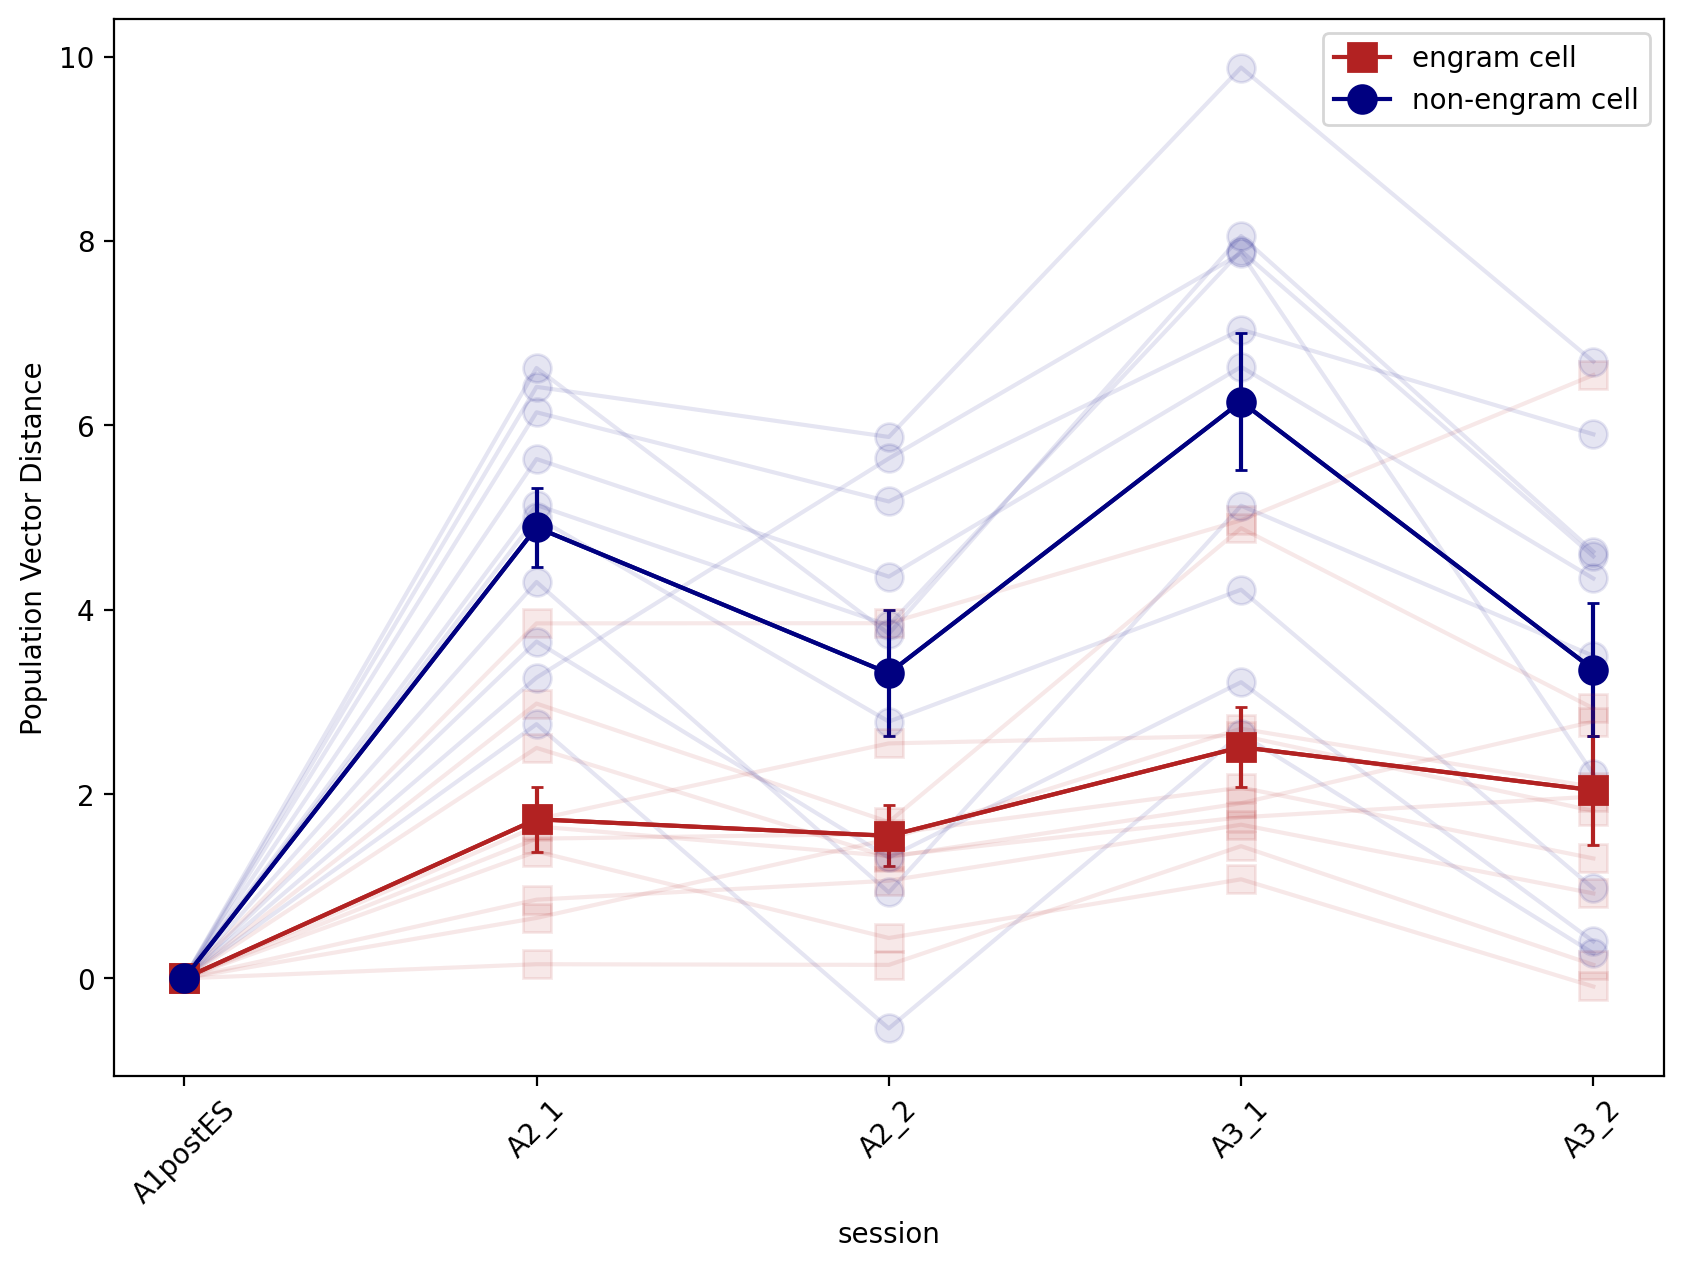

In [14]:
engram_distances = calc_across_session_df.iloc[:, 0:5]
non_engram_distances = calc_across_session_df.iloc[:, 5:]

x = engram_distances.columns.get_level_values('context').to_numpy()
engram_y, engram_err = engram_distances.mean(), engram_distances.sem()
non_engram_y, non_engram_err = non_engram_distances.mean(), non_engram_distances.sem()

plt.figure(figsize=(10, 7), dpi=200)
plt.errorbar(x, engram_y, yerr=engram_err, capsize=2, c='firebrick')
plt.plot(x, engram_y, marker='s', markersize=10, label='engram cell', c='firebrick', zorder=12)
plt.errorbar(x, non_engram_y, yerr=non_engram_err, capsize=2, c='navy')
plt.plot(x, non_engram_y, marker='o', markersize=10, label='non-engram cell', c='navy', zorder=12)

for index, rows in engram_distances.iterrows():
    plt.plot(x, rows, marker='s', markersize=10, c='firebrick', alpha=0.1)
    
for index, rows in non_engram_distances.iterrows():
    plt.plot(x, rows, marker='o', markersize=10, c='navy', alpha=0.1)

plt.xticks(rotation=45)
plt.xlabel('session')
plt.ylabel('Population Vector Distance')
plt.legend()
plt.show()